# **Entrenamiento y predicción**

## **Métodos necesarios**

### **Matriz de confusión**

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title='Matriz de Confusión', cmap=plt.cm.Blues):
    """
    Esta función muestra una matriz de confusión en forma gráfica.
    """
    # Crear matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Normalizar los valores si es necesario
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Configurar el gráfico
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Etiquetar los ejes
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Real')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()
    plt.show()


# **1. Enfoque 1 - Frecuencia Mel**

### Empezamos importando los datos

In [2]:
import pandas as pd

# Obtenemos el dataset desde el archivo creado en el anterior notebook
df = pd.read_csv('./Datos/enfoque1/dataframe.csv')
df

,feature,label
0,[-655.03894 63.1695 10.757038 21.1...,whistle
1,[-578.7469 81.91728 -10.924023 11.2...,whistle
2,[-567.00964 82.101105 -14.731988 12.7339...,whistle
3,[-576.83685 77.57335 -15.542832 14.3...,whistle
4,[-557.8747 78.30917 -13.749625 16.7...,whistle
...,...,...
5454,[-562.69415 70.66823 -6.884647 23.8...,allfreq
5455,[-546.1909 69.080666 -14.523592 22.1...,allfreq
5456,[-586.30975 74.10078 -6.768806 26.6...,allfreq
5457,[-585.0476 75.75177 -2.8806534 26.3...,allfreq


Como podemos observar al cargar el dataset tenemos la parte de las `feature` en una string eso es un problema asique vamos a transformar de string a un array 

In [3]:
import numpy as np

# Imprimir el tipo de datos del primer elemento de la columna 'feature'
print(type(df['feature'][0]))

def convert_to_array(str_val):
    # Reemplazar los caracteres '\n' por una cadena vacía '' y los espacios duplicados '  ' por un solo espacio ' '
    str_val = str_val.replace('\n', '').replace('  ', ' ')
    # Eliminar los corchetes '[' y ']' alrededor de la cadena
    str_val = str_val.strip('[]')
    # Dividir la cadena en una lista de cadenas utilizando el espacio como separador
    features_list = str_val.split()
    # Convertir cada cadena en un número de punto flotante y agregarlos a la lista 'features'
    features = [float(value) for value in features_list]
    # Retornar una matriz NumPy creada a partir de la lista 'features'
    return np.array(features)

# Aplicar la función 'convert_to_array' a cada elemento de la columna 'feature'
df['feature'] = df['feature'].apply(convert_to_array)

# Imprimir el tipo de datos del primer elemento de la columna 'feature' después de la conversión
print(type(df['feature'][0]))

<class 'str'>
<class 'numpy.ndarray'>


Ahora vamos a crear nuestra `X` y nuestra `y` 

**`X` :**

Sera un dataframe de 20 columnas siendo cada columna un número de la frecuencia mel

**`y` :**

Sera un df de 1 columna compuesto de las clases a las que pertenece cada audio


In [4]:
features = df['feature'].to_list()
X = pd.DataFrame(columns=range(len(features[0])), data=features)
y = df.drop(columns='feature')

In [5]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-655.03894,63.169500,10.757038,21.136215,4.484089,31.330320,3.066183,24.712875,-8.296095,24.142025,-8.248991,26.009697,-10.733233,20.804834,-10.760571,18.188063,-6.863329,14.063175,-4.090499,8.624461
1,-578.74690,81.917280,-10.924023,11.234460,-4.377991,20.155209,5.583762,24.466402,-9.740192,20.394806,-8.053699,22.449516,-6.228172,21.965550,-12.222945,17.091827,-6.970063,15.083657,-9.954753,11.730551
2,-567.00964,82.101105,-14.731988,12.733934,-8.998794,20.640368,9.156942,21.845205,-13.367733,22.585958,-6.374838,20.176239,-5.401113,21.010586,-6.475297,17.895168,-5.158005,12.614172,-3.478589,9.361365
3,-576.83685,77.573350,-15.542832,14.319379,-9.472738,22.840683,3.852125,23.177464,-13.300287,25.567421,-9.818583,22.131670,-5.557333,20.641937,-7.259668,17.392326,-7.789606,13.903425,-2.200932,9.534672
4,-557.87470,78.309170,-13.749625,16.721146,-4.221141,25.743467,4.223830,23.770823,-5.493849,21.148441,-13.086636,17.771463,-8.402151,17.739447,-10.582404,15.450899,-8.976308,14.232722,-4.587385,9.733555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454,-562.69415,70.668230,-6.884647,23.808416,-1.290732,26.164165,1.366706,22.283495,-10.204620,18.495432,-8.033647,24.025715,-4.661413,20.114210,-6.924646,16.165075,-5.864742,14.081470,-3.513756,10.816447
5455,-546.19090,69.080666,-14.523592,22.163635,-4.684685,23.391790,-1.798233,20.151752,-8.400525,17.420397,-7.451912,20.247835,-4.005499,17.937338,-4.813669,13.338392,-3.977106,11.021453,-1.196533,8.189395
5456,-586.30975,74.100780,-6.768806,26.699821,1.114983,26.583038,1.371233,26.010954,-7.421478,21.659900,-6.534761,23.863783,-6.375581,19.512798,-6.906247,16.490310,-4.215941,13.495682,-1.765210,8.991456
5457,-585.04760,75.751770,-2.880653,26.330290,3.998790,28.459420,2.180055,23.271072,-5.082721,22.738983,-7.349165,22.668991,-4.029947,19.612257,-5.611763,15.260265,-4.970442,13.279258,-1.227788,10.630218


In [6]:
y

,label
0,whistle
1,whistle
2,whistle
3,whistle
4,whistle
...,...
5454,allfreq
5455,allfreq
5456,allfreq
5457,allfreq


### Dividendo el data set

In [7]:
from sklearn.model_selection import train_test_split

# Dividir el tercio aleatorio en un 20% para el conjunto de prueba y un 80% para el conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


### Eligiendo los modelos

Voy a utilizar una librería llamada lazypredict para obtener una simulación de los varios modelos me quedare con los 2 mejores para hacer mis entrenamientos

In [8]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models.sort_values('Accuracy', ascending=False)


100%|██████████| 29/29 [00:09<00:00,  2.94it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.71,0.40,None,0.69,1.60
SVC,0.71,0.40,None,0.69,0.78
ExtraTreesClassifier,0.70,0.39,None,0.68,0.47
LGBMClassifier,0.70,0.40,None,0.68,0.31
BaggingClassifier,0.69,0.40,None,0.68,0.69
RidgeClassifierCV,0.68,0.36,None,0.64,0.03
LinearSVC,0.68,0.36,None,0.65,0.61
CalibratedClassifierCV,0.68,0.36,None,0.65,2.32
RidgeClassifier,0.68,0.36,None,0.64,0.03


## **RandomForestClassifier**

Lo primero a realizar va a ser la obtención de los mejores parámetros para ello utilizare `RandomizedSearchCV`

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Definir los hiperparámetros a explorar en el modelo
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced'],
}

# Crear un objeto SVC y aplicar la búsqueda aleatoria de hiperparámetros
rf_classifier = RandomForestClassifier(n_jobs=-1)

random_rfc = RandomizedSearchCV(
    estimator=rf_classifier, param_distributions=param_dist, cv=5, random_state=0, n_jobs=-1)
random_rfc.fit(X_train, y_train)
print('Done!')


Done!


Una vez ya tengo los parámetros realizare un entrenamiento y una predicción y mostrare la matriz de confusión

Best params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}
Accuracy: 0.7106227106227107


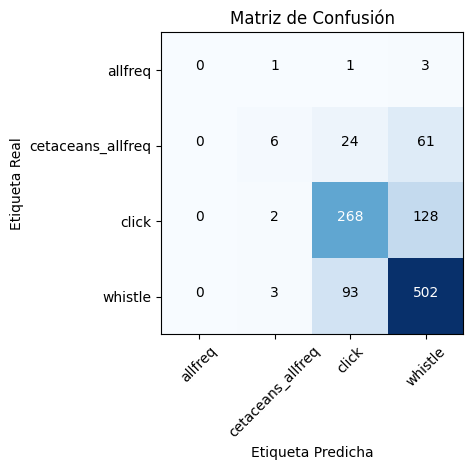

In [10]:
from sklearn.metrics import accuracy_score

rfc = random_rfc.best_estimator_.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rfc.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Best params:", random_rfc.best_params_)
print("Accuracy:", accuracy)

# Imprimir matriz de confusión
plot_confusion_matrix(y_test, y_pred, classes=unique_labels(y_test, y_pred))


Exportamos el modelo

In [11]:
!mkdir Models

A subdirectory or file Models already exists.


In [12]:
import joblib

# Exporta el modelo a un archivo
joblib.dump(rfc, './Models/modelo_rfc.pkl')

['./Models/modelo_rfc.pkl']

## **SVC**

Lo primero a realizar va a ser la obtención de los mejores parámetros para ello utilizare `RandomizedSearchCV`

In [13]:
for

SyntaxError: invalid syntax (3193057967.py, line 1)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Definir los hiperparámetros a explorar en el modelo
param_dist = {
    'C': [1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],
    'gamma': ['scale', 'auto'],
    'shrinking': [False],
    'decision_function_shape': ['ovo', 'ovr'],
    'break_ties': [True, False]
}

# Crear un objeto SVC y aplicar la búsqueda aleatoria de hiperparámetros
svm = SVC()

random_svm = RandomizedSearchCV(
    estimator=svm, param_distributions=param_dist, cv=5, random_state=0, n_jobs=-1)
random_svm.fit(X_train, y_train)
print('Done!')


Done!


Una vez ya tengo los parámetros realizare un entrenamiento y una predicción y mostrare la matriz de confusión

Best params: {'shrinking': False, 'kernel': 'poly', 'gamma': 'auto', 'degree': 2, 'decision_function_shape': 'ovr', 'break_ties': False, 'C': 1}
Accuracy: 0.6804029304029304


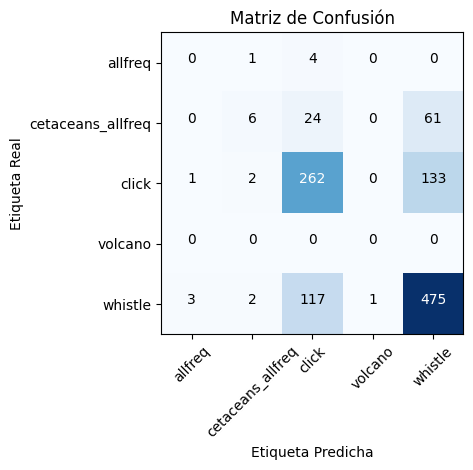

In [ ]:
from sklearn.metrics import accuracy_score

svc = random_svm.best_estimator_.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Best params:", random_svm.best_params_)
print("Accuracy:", accuracy)

# Imprimir matriz de confusión
plot_confusion_matrix(y_test, y_pred, classes=unique_labels(y_test, y_pred))


Exportamos el modelo

In [ ]:
!mkdir Models

A subdirectory or file Models already exists.


In [ ]:
import joblib

# Exporta el modelo a un archivo
joblib.dump(svc, './Models/modelo_svc.pkl')

['./Models/modelo_svc.pkl']

## **Red Neuronal con LSTM**

Realizamos la codificación de etiquetas y la conversión a codificación one-hot para los datos de destino `y_train` y `y_test`.

In [14]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Combinar y_train y y_test
y_combined = np.concatenate((y_train, y_test), axis=0)

# Aplicar LabelEncoder y to_categorical a y_combined
le = LabelEncoder()
y_encoded = le.fit_transform(y_combined)
y_categorical = to_categorical(y_encoded)

# Dividir nuevamente en y_train y y_test
y_train = y_categorical[:len(y_train)]
y_test = y_categorical[len(y_train):]


A continuación vamos a crear el modelo y realizar un entrenamiento, luego obtendremos el loss y la precisión de nuestro modelo

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Definir la arquitectura del modelo
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))  # Capa Dropout con una tasa de dropout del 50%
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Capa Dropout con una tasa de dropout del 50%
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=128,
                    validation_data=(X_test, y_test))

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/50
35/35 [==============================] - 1s 9ms/step - loss: 36.9907 - accuracy: 0.4236 - val_loss: 4.6907 - val_accuracy: 0.3654
Epoch 2/50
35/35 [==============================] - 0s 6ms/step - loss: 14.7065 - accuracy: 0.4174 - val_loss: 2.0996 - val_accuracy: 0.5495
Epoch 3/50
35/35 [==============================] - 0s 5ms/step - loss: 9.2217 - accuracy: 0.4271 - val_loss: 2.1618 - val_accuracy: 0.5476
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 5.9831 - accuracy: 0.4349 - val_loss: 1.1530 - val_accuracy: 0.3187
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 4.3360 - accuracy: 0.4387 - val_loss: 1.0133 - val_accuracy: 0.3553
Epoch 6/50
35/35 [==============================] - 0s 5ms/step - loss: 3.0438 - accuracy: 0.4401 - val_loss: 1.0344 - val_accuracy: 0.5485
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 2.4424 - accuracy: 0.4378 - val_loss: 1.1168 - val_accuracy: 0.3645
Epoch 8/50
35/35 [

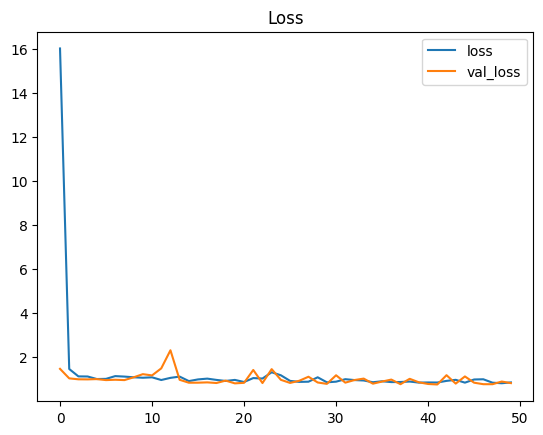

In [17]:
# Make a plot for the loss
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()


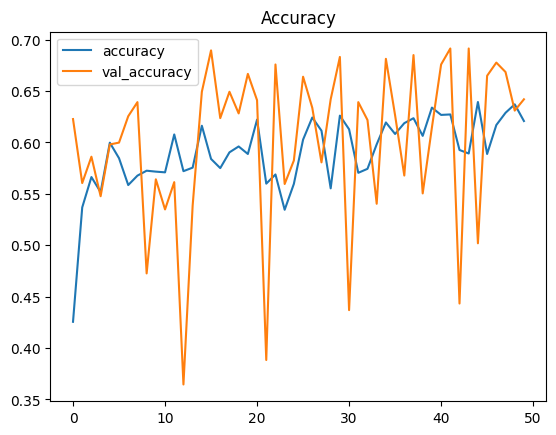

In [18]:
# Make a plot for the accuracy
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()


Ahora vamos a realizar una predicción y la vamos a decodificar

In [ ]:
y_pred = model.predict(X_test)
y_test = le.inverse_transform(np.argmax(y_test, axis=1))
y_pred= le.inverse_transform(np.argmax(y_pred, axis=1))

35/35 [==============================] - 0s 5ms/step


Mostramos la matriz de confusión

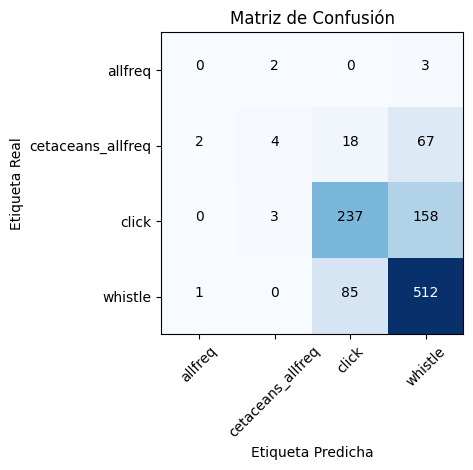

In [ ]:
plot_confusion_matrix(y_test, y_pred,
                      classes=unique_labels(y_test, y_pred))


Exportamos el modelo

In [ ]:
!mkdir Models

A subdirectory or file Models already exists.


In [ ]:
import tensorflow as tf
import joblib

# Guarda el modelo en formato h5
tf.keras.models.save_model(model, './Models/modeloRN_mel.h5')
joblib.dump(le, './Models/label_encoder_mel.pkl')

['./Models/label_encoder_mel.pkl']

# **2. Enfoque 2 - Imagenes de espectogramas**

Lo primero que vamos a hacer es obtener todas las imágenes 

In [ ]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Utilizamos sólo los 18 personajes del dataset que tienen más imágenes.
MAP_LABELS = {
    0: 'allfreq', 1: 'cetaceans_allfreq', 2: 'click',
    3: 'volcano', 4: 'whistle'
}

# Vamos a standarizar todas las imágenes a tamaño 64x64
IMG_SIZE = 128

In [ ]:
import os 
import cv2
import numpy as np

def load_train_set(dirname, map_characters, verbose=True):
    X_train = []
    y_train = []
    for label, character in map_characters.items():        
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("png")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(character)
    return np.array(X_train), np.array(y_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

DATASET_PATH = "./Datos/enfoque2/"

X, y = load_train_set(DATASET_PATH, MAP_LABELS)
X = X / 255.0

# Aplicar LabelEncoder y to_categorical a y_combined
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

Leyendo 23 imágenes encontradas de allfreq
Leyendo 476 imágenes encontradas de cetaceans_allfreq
Leyendo 2077 imágenes encontradas de click
Leyendo 4 imágenes encontradas de volcano
Leyendo 2879 imágenes encontradas de whistle


Luego vamos a crear nuestro modelo y vamos a ponerlo a entrenar 

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:
# Definir la arquitectura de la red neuronal
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               16257152  
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 16,258,693
Trainable params: 16,258,693
Non-trainable params: 0
__________________________________________

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
from sklearn.model_selection import train_test_split

# Divide los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.75, random_state=42)

In [ ]:
history = model.fit(
    X_train, Y_train, 
    validation_data=(X_val, Y_val),
    batch_size=32,
    epochs=10
)


Epoch 1/10
137/137 [==============================] - 76s 519ms/step - loss: 1.1358 - accuracy: 0.5766 - val_loss: 0.7813 - val_accuracy: 0.6337
Epoch 2/10
137/137 [==============================] - 11s 77ms/step - loss: 0.7713 - accuracy: 0.6625 - val_loss: 0.7435 - val_accuracy: 0.6557
Epoch 3/10
137/137 [==============================] - 5s 38ms/step - loss: 0.6927 - accuracy: 0.7099 - val_loss: 0.6942 - val_accuracy: 0.6850
Epoch 4/10
137/137 [==============================] - 27s 200ms/step - loss: 0.6297 - accuracy: 0.7376 - val_loss: 0.6131 - val_accuracy: 0.7546
Epoch 5/10
137/137 [==============================] - 2s 11ms/step - loss: 0.5803 - accuracy: 0.7630 - val_loss: 0.6440 - val_accuracy: 0.7143
Epoch 6/10
137/137 [==============================] - 1s 10ms/step - loss: 0.5386 - accuracy: 0.7827 - val_loss: 0.6131 - val_accuracy: 0.7363
Epoch 7/10
137/137 [==============================] - 1s 10ms/step - loss: 0.4646 - accuracy: 0.8173 - val_loss: 0.5824 - val_accuracy: 0

y por ultimo vamos a evaluar el modelo con la matriz de confusión 

26/26 [==============================] - 0s 3ms/step


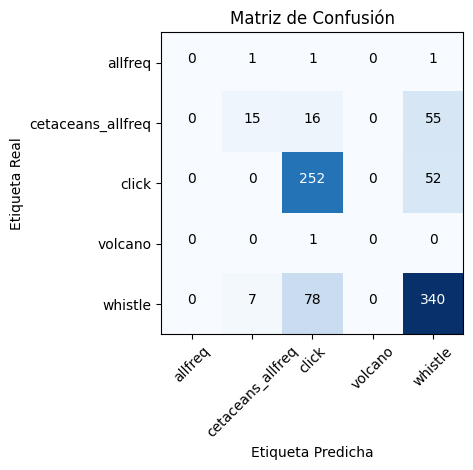

In [ ]:

y_pred = model.predict(X_test)
Y_test= le.inverse_transform(np.argmax(Y_test, axis=1))
y_pred= le.inverse_transform(np.argmax(y_pred, axis=1))

plot_confusion_matrix(Y_test, y_pred,
                      classes=unique_labels(Y_test, y_pred))


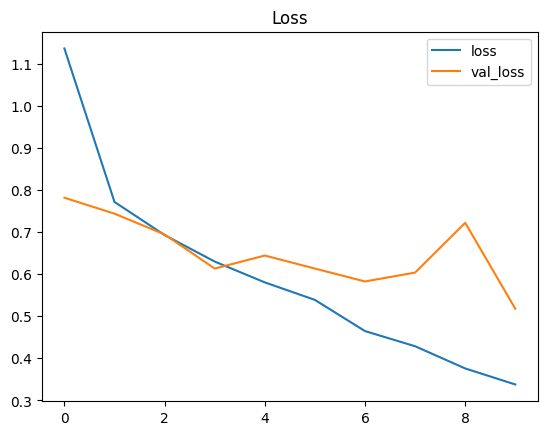

In [ ]:
import pandas as pd

# Make a plot for the loss
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()


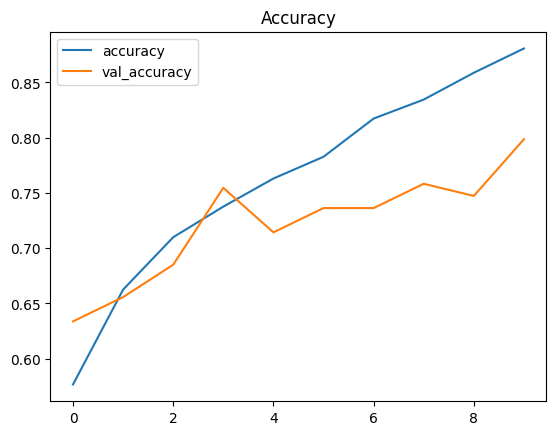

In [ ]:
# Make a plot for the accuracy
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()


Exportamos el modelo

In [ ]:
!mkdir Models

A subdirectory or file Models already exists.


In [ ]:
import tensorflow as tf
import joblib

# Guarda el modelo en formato h5
tf.keras.models.save_model(model, './Models/modeloRN_img.h5')
joblib.dump(le, './Models/label_encoder_img.pkl')

['./Models/label_encoder_img.pkl']